**Heart Disease Prediction Using Machine Learning Techniques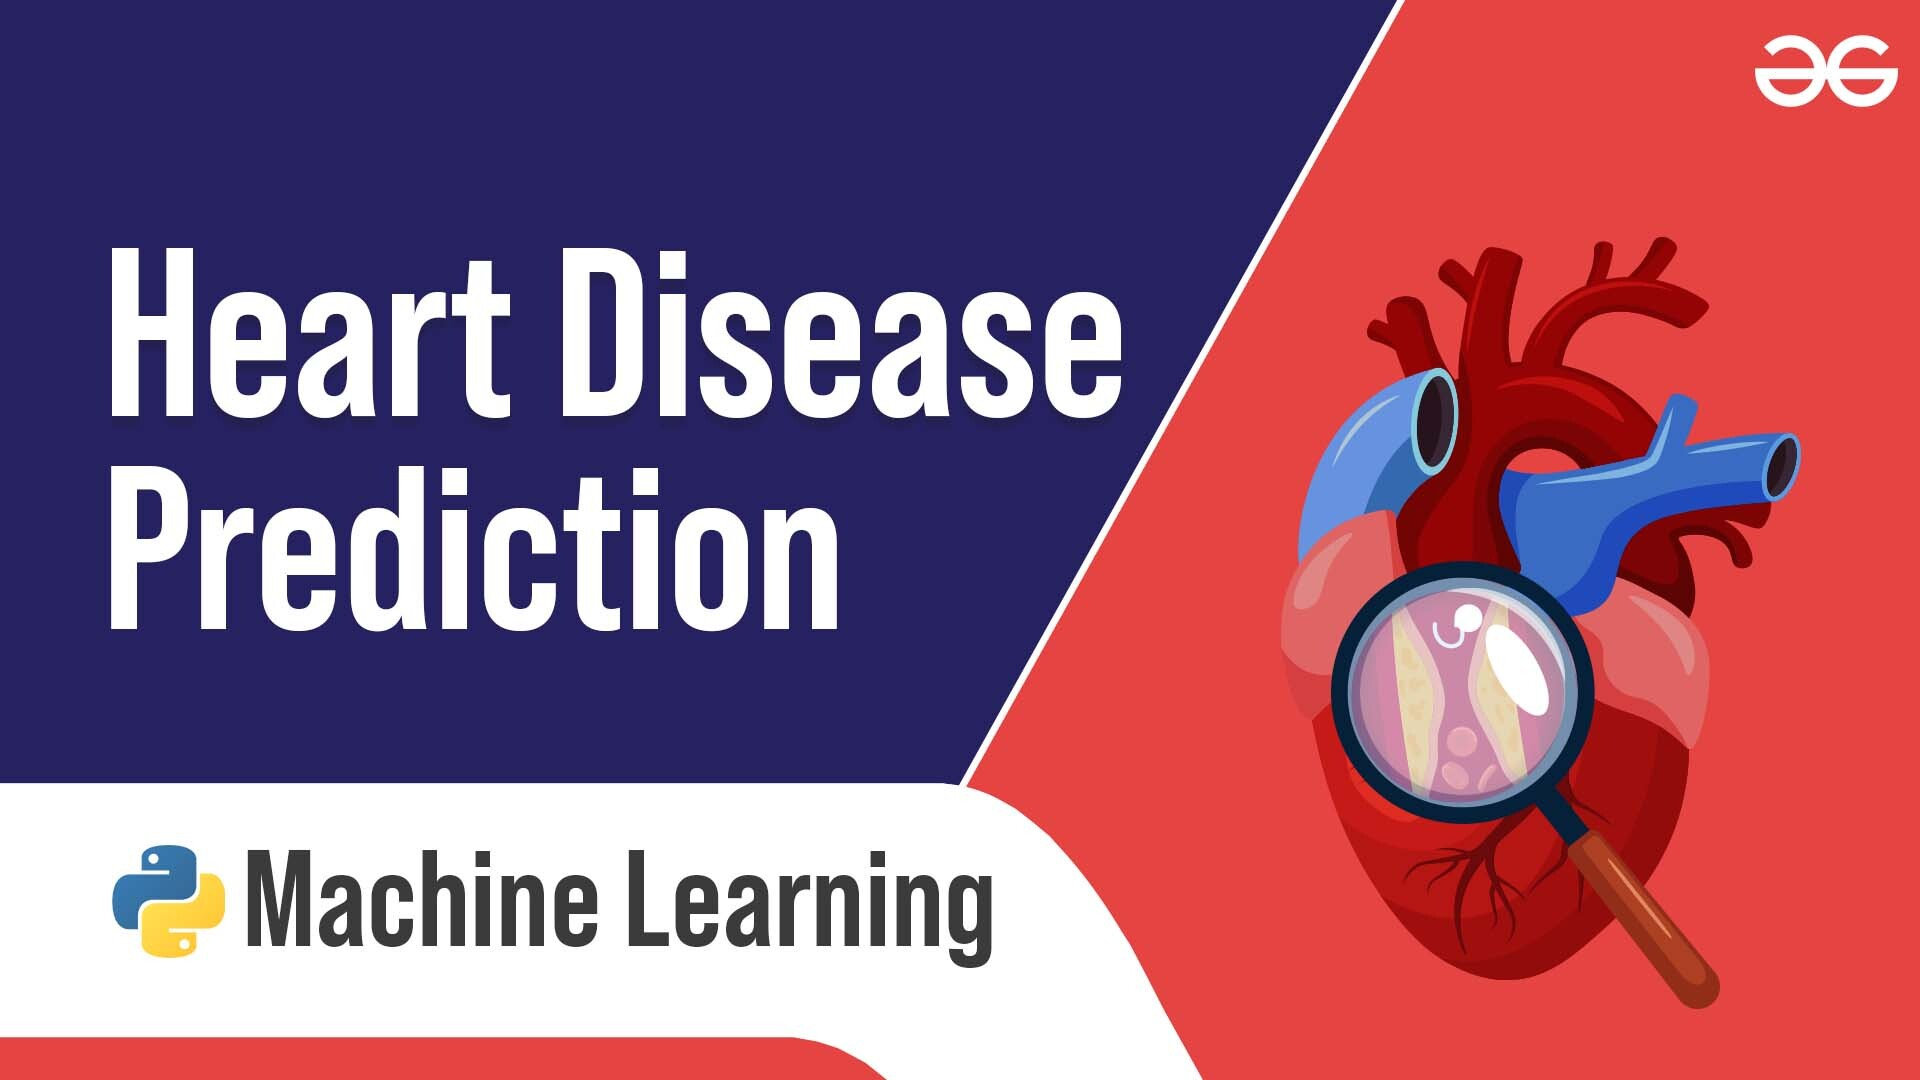**

**Set Up Your Environment :Install Required Libraries**

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


In [38]:
!pip install ucimlrepo xgboost shap scikit-learn matplotlib seaborn


**Load Heart Disease Dataset**

In [39]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Fetch dataset
heart_disease = fetch_ucirepo(id=45)

# Extract features and target
X = heart_disease.data.features
y = heart_disease.data.targets

# Combine into a single DataFrame
df = pd.concat([X, y], axis=1)

# Optional: Save as CSV
df.to_csv('heart_data.csv', index=False)
print("CSV saved as heart_data.csv")

# Check first 5 rows
df.head()


CSV saved as heart_data.csv


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0




*   Encode Categorical Features
*   Separate Features and Target
*   Scale All Features






In [40]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Identify categorical columns
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']  # adjust based on dataset

# Encode categorical features
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Separate features and target (note: target column is 'num')
X = df.drop('num', axis=1)
y = df['num']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**Train/Test Split**

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 242
Testing samples: 61


**Check & Fix Missing Values**

In [42]:
# Check which columns have missing values
print(df.isna().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        0
num         0
dtype: int64




*   One-Hot Encode Categorical Variables
*   Re-Scale the Updated Features




In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [45]:
import pandas as pd

print(df.isna().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        0
num         0
dtype: int64


In [46]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')  # fills NaN with median value
X_imputed = imputer.fit_transform(X)  # X = your feature dataframe

# Convert back to DataFrame (optional)
X = pd.DataFrame(X_imputed, columns=X.columns)


In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [49]:


# Ensure y_train and y_test are integers and 1D
y_train = y_train.astype(int).ravel()
y_test = y_test.astype(int).ravel()

for name, model in models.items():
    try:
        # For XGBoost, make sure objective is set for binary classification
        if name == "XGBoost":
            model.set_params(objective='binary:logistic')

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f"{name} Accuracy:", acc)
    except Exception as e:
        print(f"{name} failed: {e}")


Logistic Regression Accuracy: 0.6065573770491803


/tmp/ipython-input-1965551360.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train = y_train.astype(int).ravel()
/tmp/ipython-input-1965551360.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.astype(int).ravel()


Random Forest Accuracy: 0.5573770491803278
KNN Accuracy: 0.5573770491803278
SVM Accuracy: 0.5573770491803278
XGBoost Accuracy: 0.5081967213114754


**Train and Compare Multiple Models**

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(probability=True),
    "XGBoost": xgb.XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42)
}

# Train and evaluate models
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"=== {name} ===")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n")


=== Logistic Regression ===
Accuracy: 0.6065573770491803
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        33
           1       0.36      0.36      0.36        11
           2       0.20      0.14      0.17         7
           3       0.43      0.43      0.43         7
           4       0.00      0.00      0.00         3

    accuracy                           0.61        61
   macro avg       0.36      0.36      0.36        61
weighted avg       0.56      0.61      0.58        61

Confusion Matrix:
 [[29  3  1  0  0]
 [ 6  4  1  0  0]
 [ 2  1  1  3  0]
 [ 0  1  2  3  1]
 [ 0  2  0  1  0]]


=== Random Forest ===
Accuracy: 0.5573770491803278
              precision    recall  f1-score   support

           0       0.74      0.97      0.84        33
           1       0.17      0.09      0.12        11
           2       0.14      0.14      0.14         7
           3       0.00      0.00      0.00         7
           4       0

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

=== XGBoost ===
Accuracy: 0.5081967213114754
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        33
           1       0.07      0.09      0.08        11
           2       0.17      0.14      0.15         7
           3       0.20      0.14      0.17         7
           4       0.00      0.00      0.00         3

    accuracy                           0.51        61
   macro avg       0.25      0.25      0.25        61
weighted avg       0.50      0.51      0.50        61

Confusion Matrix:
 [[28  3  2  0  0]
 [ 5  1  2  3  0]
 [ 1  4  1  0  1]
 [ 0  4  1  1  1]
 [ 0  2  0  1  0]]




**Select Best Model & Save It**

In [51]:
import joblib

# Select best model based on highest accuracy
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

print(f"Best Model: {best_model_name} with accuracy {results[best_model_name]:.2f}")



Best Model: Logistic Regression with accuracy 0.61


In [52]:
# Convert target to binary: 0 = no disease, 1 = disease
y = df['num'].apply(lambda x: 1 if x > 0 else 0)


In [53]:
X = df.drop('num', axis=1)
y = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Impute missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=X.columns)

# One-hot encode categorical columns
X = pd.get_dummies(X, columns=['cp','thal','slope','restecg','sex','fbs','exang'], drop_first=True)

# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


**Optimize Random Forest Using GridSearchCV**

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)

# Grid search for better parameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

best_rf = grid.best_estimator_
y_pred = best_rf.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Random Forest Accuracy: 0.9016393442622951
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        33
           1       0.87      0.93      0.90        28

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [56]:
import joblib

# Save the best Random Forest model
joblib.dump(best_rf, 'heart_disease_model.pkl')


['heart_disease_model.pkl']

In [57]:
model = joblib.load('heart_disease_model.pkl')

# Example prediction
sample = X_test[0].reshape(1, -1)
print("Predicted class:", model.predict(sample))
print("Probability:", model.predict_proba(sample))


Predicted class: [0]
Probability: [[0.63040284 0.36959716]]


**Make a Prediction Using a Real Test Sample**

In [58]:
import numpy as np
import joblib

# Load saved model
model = joblib.load('heart_disease_model.pkl')

# Example input (make sure it matches the order of your one-hot encoded X columns)
# Let's take a random test sample for simplicity
sample = X_test[0].reshape(1, -1)  # reshape to 2D array

# Predict class
prediction = model.predict(sample)[0]

# Predict probability
probability = model.predict_proba(sample)[0][prediction]

# Print results
print("Prediction (0 = No disease, 1 = Disease):", prediction)
print("Probability of predicted class:", probability)


Prediction (0 = No disease, 1 = Disease): 0
Probability of predicted class: 0.630402844090811


**Make a Prediction Using Custom Manual Input**

In [59]:
# Example patient data:
# age=55, trestbps=140, chol=220, thalach=150, oldpeak=1.0, ca=0
# cp=2, thal=3, slope=2, restecg=1, sex=1, fbs=0, exang=0
# After one-hot encoding, we need to create a full vector matching X columns

# For simplicity, use zeros and set the relevant one-hot columns to 1
custom_input = np.zeros(X_test.shape[1])
custom_input[0] = 55          # age
custom_input[1] = 140         # trestbps
custom_input[2] = 220         # chol
custom_input[3] = 150         # thalach
custom_input[4] = 1.0         # oldpeak
custom_input[5] = 0           # ca
# one-hot encoding positions will depend on your X dataframe structure
# e.g., cp_2, thal_3, slope_2, restecg_1, sex_1, fbs_0, exang_0
# set the appropriate indices to 1

sample = custom_input.reshape(1, -1)
prediction = model.predict(sample)[0]
probability = model.predict_proba(sample)[0][prediction]

print("Custom Input Prediction:", prediction)
print("Probability:", probability)


Custom Input Prediction: 0
Probability: 0.5470280508424373


In [60]:
joblib.dump(model, 'heart_disease_model.pkl')


['heart_disease_model.pkl']

In [61]:
from google.colab import files
files.download('heart_disease_model.pkl')




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>